In [1]:
import torch
import torchvision.transforms as transforms
from models import moe_tinyimagenet
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid
import numpy as np
from utils import load_tinyimagenet_dataset, StratifiedBatchSampler
from IPython.display import display
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask

In [2]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = TF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

val_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean, std)
])

In [4]:
train_dataset, val_dataset = load_tinyimagenet_dataset(val_transform, val_transform, 
                                                       dataset_path='/media/aristo/Data A/documents/kuliah/Project/Localizable-Rotation/imagenet/data/tiny-imagenet-200')

In [5]:
IDX_TO_LABEL = {v: k for k, v in train_dataset.class_to_idx.items()}

In [6]:
IDX_TO_LABEL

{0: 'n01443537',
 1: 'n01629819',
 2: 'n01641577',
 3: 'n01644900',
 4: 'n01698640',
 5: 'n01742172',
 6: 'n01768244',
 7: 'n01770393',
 8: 'n01774384',
 9: 'n01774750',
 10: 'n01784675',
 11: 'n01855672',
 12: 'n01882714',
 13: 'n01910747',
 14: 'n01917289',
 15: 'n01944390',
 16: 'n01945685',
 17: 'n01950731',
 18: 'n01983481',
 19: 'n01984695',
 20: 'n02002724',
 21: 'n02056570',
 22: 'n02058221',
 23: 'n02074367',
 24: 'n02085620',
 25: 'n02094433',
 26: 'n02099601',
 27: 'n02099712',
 28: 'n02106662',
 29: 'n02113799',
 30: 'n02123045',
 31: 'n02123394',
 32: 'n02124075',
 33: 'n02125311',
 34: 'n02129165',
 35: 'n02132136',
 36: 'n02165456',
 37: 'n02190166',
 38: 'n02206856',
 39: 'n02226429',
 40: 'n02231487',
 41: 'n02233338',
 42: 'n02236044',
 43: 'n02268443',
 44: 'n02279972',
 45: 'n02281406',
 46: 'n02321529',
 47: 'n02364673',
 48: 'n02395406',
 49: 'n02403003',
 50: 'n02410509',
 51: 'n02415577',
 52: 'n02423022',
 53: 'n02437312',
 54: 'n02480495',
 55: 'n02481823',
 5

In [7]:
torch.tensor(train_dataset.targets)

tensor([  0,   0,   0,  ..., 199, 199, 199])

In [8]:
sampler = StratifiedBatchSampler(torch.tensor(train_dataset.targets), 200)

In [9]:
train_loader = DataLoader(train_dataset, batch_sampler=sampler, num_workers=1)

In [10]:
batch_data = next(iter(train_loader))

In [11]:
batch_data

[tensor([[[[-1.3130, -1.6042, -1.3130,  ..., -1.1932, -1.1589, -0.8507],
           [-1.1932, -1.5699, -1.3987,  ..., -1.3130, -1.3130, -1.2445],
           [-1.3644, -1.7754, -1.7412,  ..., -1.4158, -1.4500, -1.5014],
           ...,
           [-2.1179, -2.1179, -2.0837,  ..., -2.0323, -2.1179, -2.0494],
           [-2.1179, -2.1179, -2.1008,  ..., -1.8268, -1.8439, -1.9295],
           [-2.1179, -2.1179, -2.1179,  ..., -1.8953, -1.8268, -1.8953]],
 
          [[-1.0203, -1.2654, -0.9503,  ...,  0.1352,  0.1001,  0.3452],
           [-0.8803, -1.2304, -1.0203,  ...,  0.1352,  0.0651,  0.1001],
           [-1.0553, -1.4230, -1.3704,  ...,  0.1527,  0.0476, -0.0399],
           ...,
           [-1.8431, -1.8431, -1.8782,  ..., -1.6856, -1.7731, -1.7206],
           [-1.8782, -1.8606, -1.8957,  ..., -1.6681, -1.7556, -1.8957],
           [-1.9132, -1.9132, -1.9307,  ..., -1.7906, -1.8782, -2.0357]],
 
          [[-1.3861, -1.6476, -1.2990,  ..., -1.3687, -1.4210, -1.1944],
           [-

In [12]:
inv_normalize = transforms.Normalize(
   mean= [-m/s for m, s in zip(mean, std)],
   std= [1/s for s in std]
)

In [13]:
train_grid = make_grid(inv_normalize(batch_data[0]), nrow=10)


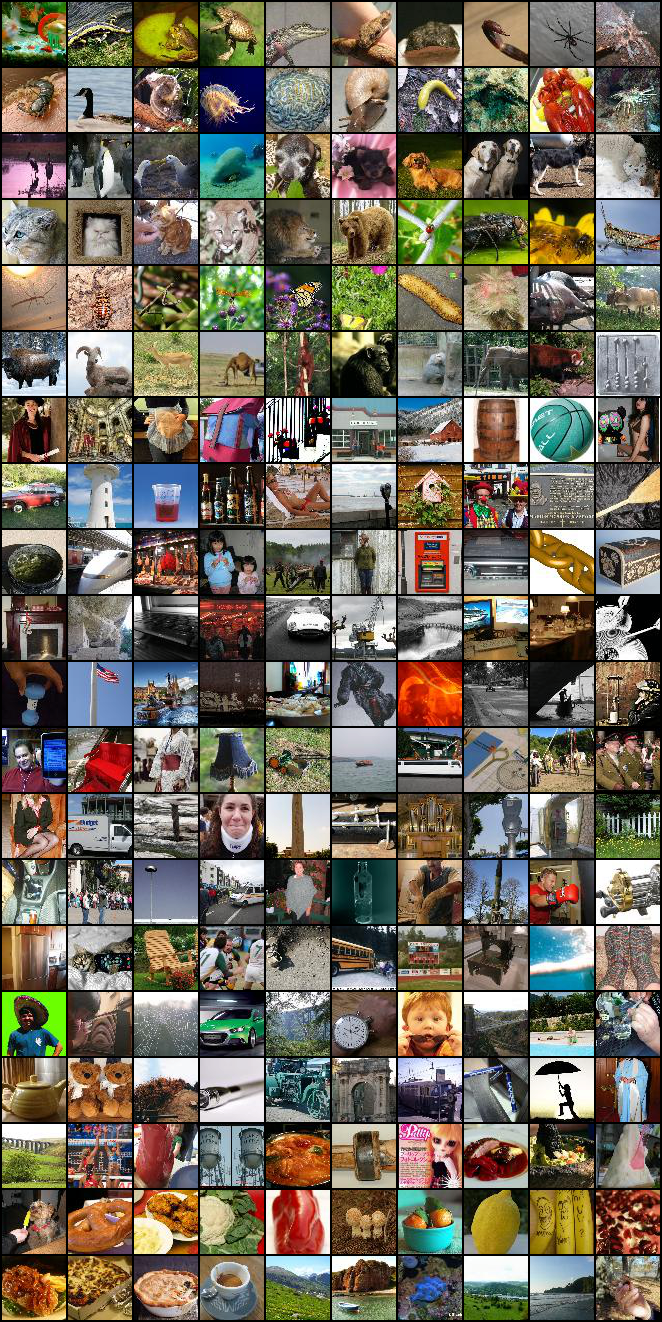

In [14]:
display(TF.to_pil_image(train_grid))

In [15]:

vannila_checkpoint = torch.load('/media/aristo/Data A/documents/kuliah/Project/tiny-imagenet/checkpoint/tiny-imagenet_vanilla_test1/ckpt.best.pth.tar')
moe_checkpoint = torch.load('/media/aristo/Data A/documents/kuliah/Project/tiny-imagenet/checkpoint/tiny-imagenet_Moe1_test2/ckpt.best.pth.tar')
nomoe_checkpoint = torch.load('/media/aristo/Data A/documents/kuliah/Project/tiny-imagenet/checkpoint/tiny-imagenet_Nomoe_test2/ckpt.best.pth.tar')
lorot_checkpoint = torch.load('/media/aristo/Data A/documents/kuliah/Project/tiny-imagenet/checkpoint/tiny-imagenet_Lorot_test1/ckpt.best.pth.tar')

In [16]:
moe_model = moe_tinyimagenet.Moe1()
moe_model.load_state_dict(moe_checkpoint['state_dict'])
vannila_model = moe_tinyimagenet.vanilla()
vannila_model.load_state_dict(vannila_checkpoint['state_dict'])
nomoe_model = moe_tinyimagenet.Nomoe()
nomoe_model.load_state_dict(nomoe_checkpoint['state_dict'])
lorot_model = moe_tinyimagenet.Lorot()
lorot_model.load_state_dict(lorot_checkpoint['state_dict'])

<All keys matched successfully>

In [17]:
moe_model.eval()
vannila_model.eval()
nomoe_model.eval()
lorot_model.eval()

Lorot(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [18]:
input_img = batch_data[0][70]

In [19]:
moe_cam = GradCAM(moe_model, moe_model.backbone.layer2, (3,64,64))
vannila_cam = GradCAM(vannila_model, vannila_model.layer2, (3,64,64))
nomoe_cam = GradCAM(nomoe_model, nomoe_model.backbone.layer2, (3,64,64))
lorot_cam = GradCAM(lorot_model, lorot_model.backbone.layer2, (3,64,64))

In [20]:
moe_out = moe_model(input_img.unsqueeze(0))
moe_ac_map = moe_cam(moe_out.squeeze(0).argmax().item(), moe_out)

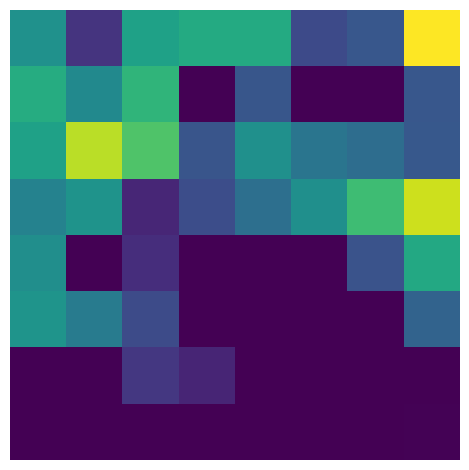

In [21]:
plt.imshow(moe_ac_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

In [22]:
moe_result=overlay_mask(transforms.ToPILImage()(inv_normalize(input_img)),transforms.ToPILImage(mode='F')(moe_ac_map[0].squeeze(0)), alpha=0.7)

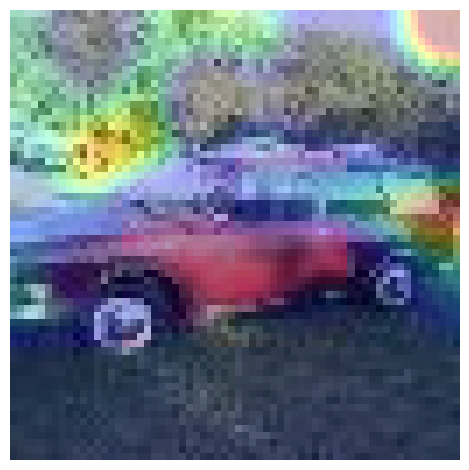

In [23]:
plt.imshow(moe_result); plt.axis('off'); plt.tight_layout(); plt.show()

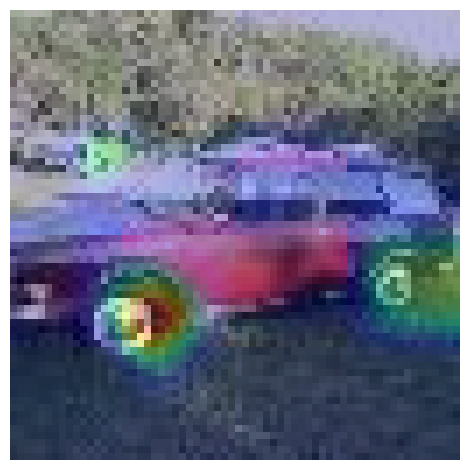

In [24]:
vannila_out = vannila_model(input_img.unsqueeze(0))
vannila_ac_map = vannila_cam(vannila_out.squeeze(0).argmax().item(), vannila_out)
vannila_result=overlay_mask(transforms.ToPILImage()(inv_normalize(input_img)),transforms.ToPILImage(mode='F')(vannila_ac_map[0].squeeze(0)), alpha=0.7)
plt.imshow(vannila_result); plt.axis('off'); plt.tight_layout(); plt.show()

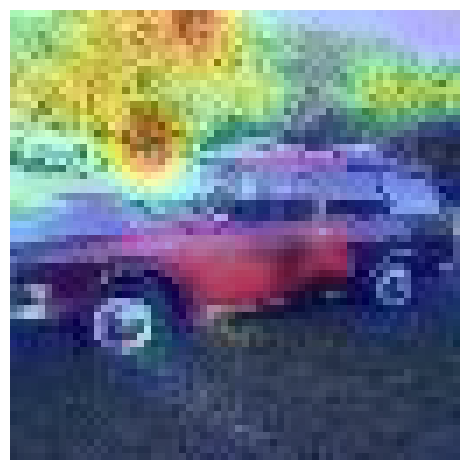

In [25]:
nomoe_out = nomoe_model(input_img.unsqueeze(0))
nomoe_ac_map = nomoe_cam(nomoe_out.squeeze(0).argmax().item(), nomoe_out)
nomoe_result=overlay_mask(transforms.ToPILImage()(inv_normalize(input_img)),transforms.ToPILImage(mode='F')(nomoe_ac_map[0].squeeze(0)), alpha=0.7)
plt.imshow(nomoe_result); plt.axis('off'); plt.tight_layout(); plt.show()

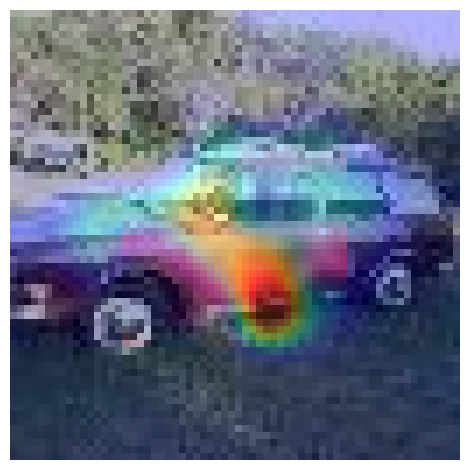

In [26]:
lorot_out = lorot_model(input_img.unsqueeze(0))
lorot_ac_map = lorot_cam(lorot_out.squeeze(0).argmax().item(), lorot_out)
lorot_result=overlay_mask(transforms.ToPILImage()(inv_normalize(input_img)),transforms.ToPILImage(mode='F')(lorot_ac_map[0].squeeze(0)), alpha=0.7)
plt.imshow(lorot_result); plt.axis('off'); plt.tight_layout(); plt.show()

In [ ]:
make_grid()